# Not MNIST data

**데이터 불러오기**

In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-09-18 00:49:29--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: 'notMNIST_small.mat'

     0K .......... .......... .......... .......... ..........  0%  150K 12m44s
    50K .......... .......... .......... .......... ..........  0%  301K 9m32s
   100K .......... .......... .......... .......... ..........  0% 19.9M 6m23s
   150K .......... .......... .......... .......... ..........  0%  279K 6m30s
   200K .......... .......... .......... .......... ..........  0% 39.6M 5m12s
   250K .......... .......... .......... .......... ..........  0% 84.6M 4m20s
   300K .......... .......... .......... .......... ..........  0% 41.4M 3m44s
   350K .......... .......... .......... .......... ..........  0%  954G 3m16s
   400K .......... .......... .......... ..

In [2]:
# 필요 Library 가져오기
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

**Data Loading**

In [4]:
# 데이터 불러오기

data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [5]:
x = data['images']
y = data['labels']

print('x.shape:', x.shape)
print('y.shape:', y.shape)

x.shape: (28, 28, 18724)
y.shape: (18724,)


In [9]:
resolution = 28
classes = len(np.unique(y))

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape((-1, resolution, resolution, 1))

(18724, 28, 28)


- 데이터 살펴보기

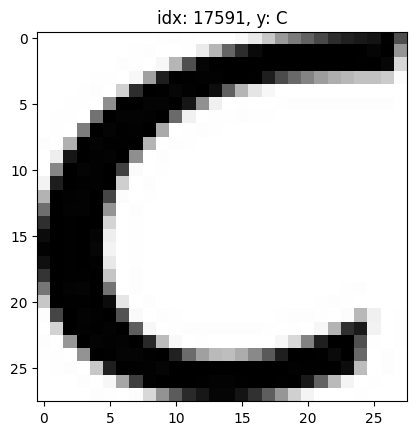

In [15]:
# ctrl + Enter로 여러 개 확인 가능

rand_i = np.random.randint(0, x.shape[0])

plt.title(f'idx: {rand_i}, y: {"ABCDEFGHIJ"[int(y[rand_i])]}')
plt.imshow(x[rand_i, :, :, 0], cmap='Greys')
plt.show()

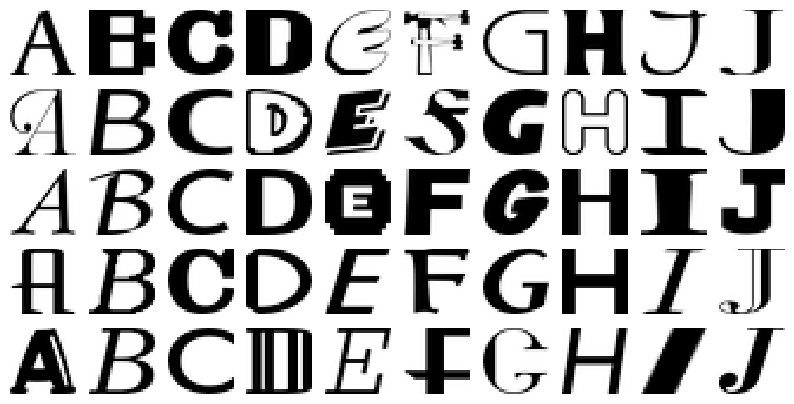

In [19]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes, rows))

for letter_id in range(classes):
    letters = x[y==letter_id]
    letters_len = len(letters)

    for row_i in range(rows):
        axe = axes[row_i, letter_id]
        axe.imshow(letters[np.random.randint(letters_len)], cmap='Greys', interpolation='none')
        axe.axis('off')

**Data Preprocessing**

- Data split
    - training : test = 8 : 2
    - random state = 2023

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

In [21]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shaep:', y_test.shape)

x_train.shape: (14979, 28, 28, 1)
x_test.shape: (3745, 28, 28, 1)
y_train.shape: (14979,)
y_test.shaep: (3745,)


- Scaling
    - min-max scaling

In [22]:
# MinMaxScaler -> Tabular Data
# 직접 -> Image Data

max_n, min_n = x_train.max(), x_train.min()

In [23]:
max_n, min_n

(255.0, 0.0)

In [24]:
# Scaling

x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

In [25]:
# 확인

x_train.max(), x_train.min()

(1.0, 0.0)

- One-hot encoding

In [26]:
class_n = len(np.unique(y_train))

In [28]:
# to_categorical -> 반복 실행 주의(차원이 바뀜)
import tensorflow as tf
import keras

y_train = tf.keras.utils.to_categorical(y_train, class_n)
y_test = tf.keras.utils.to_categorical(y_test, class_n)

- Data shape 재확인

In [29]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (14979, 28, 28, 1)
x_test.shape: (3745, 28, 28, 1)
y_train.shape: (14979, 10)
y_test.shape: (3745, 10)


**Modeling**

- Condition
    1. Functional API 사용
    2. Flatten Layer 사용
    3. Activation Function이 주어진 Dense Layer 뒤에 BatchNormalization
    4. Dropout 0.2
    5. Early Stopping

In [36]:
import tensorflow as tf
from tensorflow import keras

# 1. Session Clear
keras.backend.clear_session()

#2. 레이어 사슬처럼 엮기
X = tf.keras.layers.Input(shape=(28, 28, 1))
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(256, activation='relu')(H)
H = tf.keras.layers.Dense(256, activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.2)(H)

H = tf.keras.layers.Dense(128, activation='relu')(H)
H = tf.keras.layers.Dense(128, activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.2)(H)

H = tf.keras.layers.Dense(64, activation='relu')(H)
H = tf.keras.layers.Dense(64, activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.2)(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

# Model 시작-끝
model = tf.keras.models.Model(X, Y)

# Model compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896 

- Early Stopping

In [39]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',        # 얼리스토핑을 관측할 대상
                                         min_delta=0,               # Threshold, 설정한 값보다 크게 변해야 성능개선 간주
                                         patience=3,                # 성능 개선이 이뤄지지 않을 때 몇 번 더 지켜볼 것인지
                                         verbose=1,                 # 어느 epoch에서 얼리스토핑이 적용되었는지 보여줌
                                         restore_best_weights=True) # 가장 성능이 좋은 시점의 epoch 가중치로 돌려놓음

In [41]:
hist = model.fit(x_train, y_train,
                 epochs=100000,
                 verbose=1,
                 batch_size=128,
                 callbacks=[early],
                 validation_split=0.2)

Epoch 1/100000
94/94 [==============================] - 4s 10ms/step - loss: 0.9748 - accuracy: 0.7039 - val_loss: 0.7238 - val_accuracy: 0.8518
Epoch 2/100000
94/94 [==============================] - 1s 6ms/step - loss: 0.4549 - accuracy: 0.8658 - val_loss: 0.3987 - val_accuracy: 0.8885
Epoch 3/100000
94/94 [==============================] - 1s 6ms/step - loss: 0.3732 - accuracy: 0.8891 - val_loss: 0.3918 - val_accuracy: 0.8822
Epoch 4/100000
94/94 [==============================] - 1s 6ms/step - loss: 0.3273 - accuracy: 0.9066 - val_loss: 0.3405 - val_accuracy: 0.9002
Epoch 5/100000
94/94 [==============================] - 1s 6ms/step - loss: 0.3007 - accuracy: 0.9128 - val_loss: 0.3737 - val_accuracy: 0.8895
Epoch 6/100000
94/94 [==============================] - 1s 6ms/step - loss: 0.2742 - accuracy: 0.9191 - val_loss: 0.3662 - val_accuracy: 0.8942
Epoch 7/100000
94/94 [==============================] - 1s 6ms/step - loss: 0.2566 - accuracy: 0.9231 - val_loss: 0.3184 - val_accuracy

- evaluate

In [42]:
model.evaluate(x_test, y_test)

118/118 [==============================] - 1s 4ms/step - loss: 0.3079 - accuracy: 0.9089


[0.30786052346229553, 0.9089452624320984]

- predict

In [44]:
y_pred = model.predict(x_test)

In [46]:
y_pred[:2]

array([[3.6243309e-05, 5.4553002e-03, 3.6257759e-05, 9.9376267e-01,
        5.0644248e-05, 1.3342017e-04, 3.7522073e-05, 1.1079785e-04,
        3.3420601e-04, 4.2866104e-05],
       [8.2849938e-06, 4.2594507e-07, 1.3084333e-06, 2.0486450e-06,
        5.5815150e-07, 4.2943368e-05, 1.0247098e-06, 1.7597529e-06,
        2.1871278e-04, 9.9972290e-01]], dtype=float32)

In [47]:
# 원핫 인코딩을 다시 묶어줌
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

In [48]:
y_pred_arg.shape

(3745,)

- 평가 지표

In [50]:
from sklearn.metrics import classification_report, accuracy_score

print("accuracy:", accuracy_score(y_test_arg, y_pred_arg))
print("classification report:\n", classification_report(y_test_arg, y_pred_arg))

accuracy: 0.9089452603471295
classification report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       357
           1       0.88      0.88      0.88       365
           2       0.94      0.91      0.93       374
           3       0.87      0.92      0.89       392
           4       0.91      0.88      0.90       406
           5       0.93      0.94      0.94       377
           6       0.90      0.92      0.91       372
           7       0.94      0.91      0.92       374
           8       0.87      0.91      0.89       385
           9       0.96      0.92      0.94       343

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



**Visualization**

- 실제 데이터 확인

idx = 248
해당 인덱스의 이미지는 D
모델의 예측: B
모델의 클래스별 확률 : 
--------------------
A 2.0
B 42.0
C 1.0
D 18.0
E 3.0
F 1.0
G 1.0
H 12.0
I 12.0
J 3.0
오답


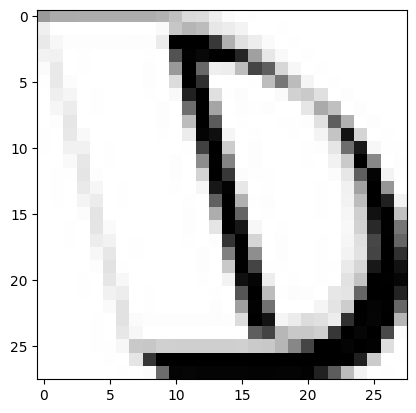

In [82]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = y_test_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor(y_pred[rand_idx]*100)

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측: {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-'*20)
for idx, val in enumerate(letters_str):
    print(val, class_prob[idx])
print('='*20)

if y_test_arg[rand_idx] == y_pred_arg[rand_idx]:
    print('정답')
else:
    print('오답')

plt.imshow(x_test[rand_idx], cmap='Greys')
plt.show()

- 틀린 이미지만 확인

In [86]:
temp = (y_test_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

341

idx = 2677
해당 인덱스의 이미지는 D
모델의 예측: H
모델의 클래스별 확률 : 
--------------------
A 12.0
B 5.0
C 1.0
D 8.0
E 6.0
F 2.0
G 7.0
H 42.0
I 11.0
J 2.0
오답


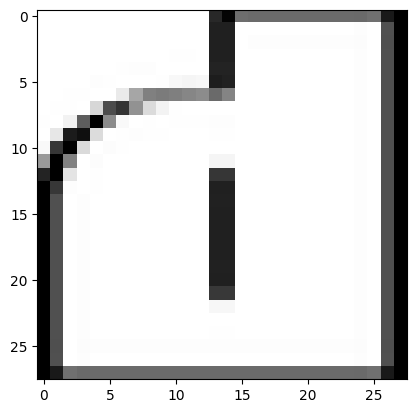

In [91]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = y_test_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor(y_pred[rand_idx]*100)

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측: {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-'*20)
for idx, val in enumerate(letters_str):
    print(val, class_prob[idx])
print('='*20)

if y_test_arg[rand_idx] == y_pred_arg[rand_idx]:
    print('정답')
else:
    print('오답')

plt.imshow(x_test[rand_idx], cmap='Greys')
plt.show()